Training Word2Vec model...
Model training complete!


C:\Users\Shrey\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Shrey\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shrey\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Shrey\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shrey\anaconda3\Lib\subprocess.py", line 1026, in __init__
 

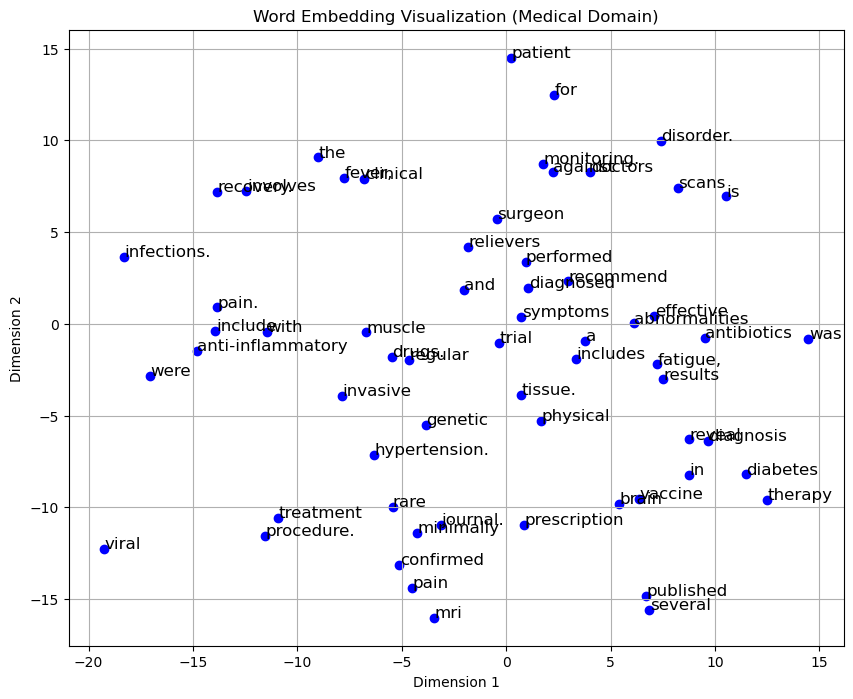

Top 5 similar words to 'treatment':
procedure. (0.27)
confirmed (0.15)
muscle (0.13)
monitoring. (0.12)
fatigue, (0.12)
Top 5 similar words to 'vaccine':
brain (0.26)
recommend (0.21)
procedure. (0.19)
therapy (0.19)
in (0.18)


In [1]:
# [1] - Install required libraries
!pip install gensim matplotlib

# [3] - Import libraries
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# [4] - Sample domain-specific corpus (medical domain)
medical_corpus = [
    "The patient was diagnosed with diabetes and hypertension.",
    "MRI scans reveal abnormalities in the brain tissue.",
    "The treatment involves antibiotics and regular monitoring.",
    "Symptoms include fever, fatigue, and muscle pain.",
    "The vaccine is effective against several viral infections.",
    "Doctors recommend physical therapy for recovery.",
    "The clinical trial results were published in the journal.",
    "The surgeon performed a minimally invasive procedure.",
    "The prescription includes pain relievers and anti-inflammatory drugs.",
    "The diagnosis confirmed a rare genetic disorder."
]

# [5] - Preprocess corpus (tokenize sentences)
processed_corpus = [sentence.lower().split() for sentence in medical_corpus]

# [6] - Train a Word2Vec model
print("Training Word2Vec model...")
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=50)
print("Model training complete!")

# [7] - Extract embeddings for visualization
words = list(model.wv.key_to_index)
embeddings = np.array([model.wv[word] for word in words])

# [8] - Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

# [10] - Visualization of word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color="blue")
for i, word in enumerate(words):
    plt.text(tsne_result[i, 0] + 0.02, tsne_result[i, 1] + 0.02, word, fontsize=12)

plt.title("Word Embedding Visualization (Medical Domain)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

# [11] - Analyze domain-specific semantics
def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.wv.most_similar(input_word, topn=top_n)
        print(f"Top {top_n} similar words to '{input_word}':")
        for word, similarity in similar_words:
            print(f"{word} ({similarity:.2f})")
    except KeyError:
        print(f"Error: '{input_word}' not found in vocabulary.")

# [12] - Example: Generate semantically similar words
find_similar_words("treatment")
find_similar_words("vaccine")